In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
%matplotlib inline

In [2]:
majors_list = pd.read_csv('majors-list.csv')
all_ages = pd.read_csv('all-ages.csv')
grad_students = pd.read_csv('grad-students.csv')
women_stem = pd.read_csv('women-stem.csv')
recent_grads = pd.read_csv('recent-grads.csv')

In [23]:
#Examine the number of majors per major category
majors_list['Major_Category'].value_counts()

#majors_list[majors_list.Major_Category == 'Engineering']

Engineering                            29
Education                              16
Humanities & Liberal Arts              15
Biology & Life Science                 14
Business                               13
Health                                 12
Computers & Mathematics                11
Physical Sciences                      10
Agriculture & Natural Resources        10
Social Science                          9
Psychology & Social Work                9
Arts                                    8
Industrial Arts & Consumer Services     7
Law & Public Policy                     5
Communications & Journalism             4
Interdisciplinary                       1
Name: Major_Category, dtype: int64

In [39]:
#Which major cateogry has the highest unemployment rates?
all_ages.groupby('Major_category').Unemployment_rate.mean().sort_values(ascending=False)

#Which specific major has the highest unemployment rate?
all_ages.groupby('Major').Unemployment_rate.mean().sort_values(ascending=False)

Major
MISCELLANEOUS FINE ARTS                                0.156147
CLINICAL PSYCHOLOGY                                    0.102712
MILITARY TECHNOLOGIES                                  0.101796
SCHOOL STUDENT COUNSELING                              0.101746
LIBRARY SCIENCE                                        0.094843
VISUAL AND PERFORMING ARTS                             0.094658
COMPUTER PROGRAMMING AND DATA PROCESSING               0.090264
SOCIAL PSYCHOLOGY                                      0.087336
ASTRONOMY AND ASTROPHYSICS                             0.086022
ARCHITECTURE                                           0.085991
FILM VIDEO AND PHOTOGRAPHIC ARTS                       0.085619
COMMUNICATION TECHNOLOGIES                             0.085009
STUDIO ARTS                                            0.083714
INDUSTRIAL AND ORGANIZATIONAL PSYCHOLOGY               0.083629
MASS MEDIA                                             0.083005
MISCELLANEOUS PSYCHOLOGY          

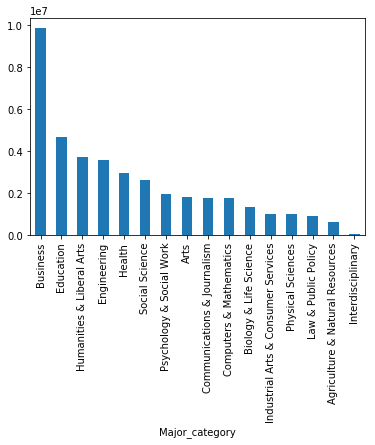

In [4]:
#Which major category has the largest number of graduates?
major_cats = all_ages.groupby('Major_category').Total.sum().sort_values(ascending=False)
major_cats.plot.bar()

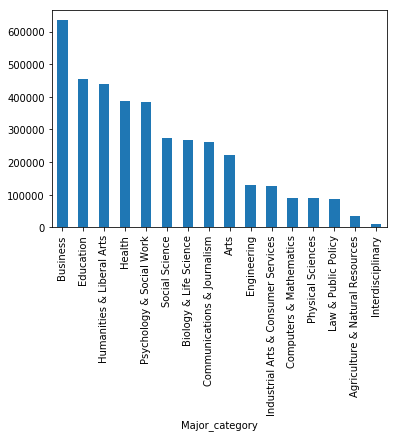

In [10]:
#Which major category has the largest percentage of women?
PctWomen = recent_grads.groupby('Major_category').ShareWomen.mean().sort_values(ascending=False)
PctWomen.plot.bar()

#Which major category has the largest total number of women?
CntWomen = recent_grads.groupby('Major_category').Women.sum().sort_values(ascending=False)
CntWomen.plot.bar()

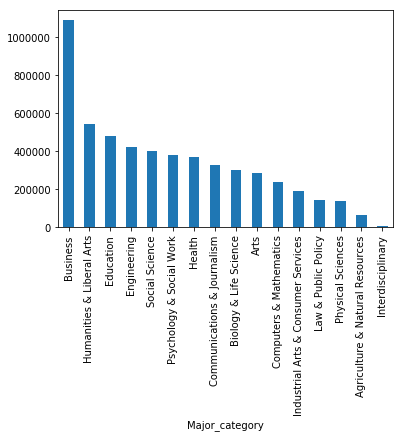

In [14]:
#Which major category has the highest percentage of people employed?
recent_grads['PctEmployed'] = recent_grads.Employed / recent_grads.Total
PctEmployed = recent_grads.groupby('Major_category').PctEmployed.mean().sort_values(ascending=False)
PctEmployed.plot.bar()

#Which major category has the highest total number of people employed?
CntEmployed = recent_grads.groupby('Major_category').Employed.sum().sort_values(ascending=False)
CntEmployed.plot.bar()
#Business is by far the leader here!

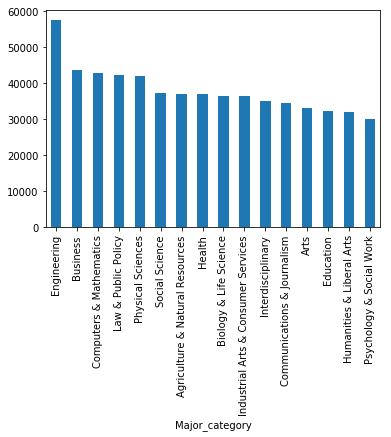

In [15]:
#Which major category has the highest mean salary?
MeanSalary = recent_grads.groupby('Major_category').Median.mean().sort_values(ascending=False)
MeanSalary.plot.bar()
#Engineering is the clear leader here!

In [17]:
recent_grads.columns.values

array(['Rank', 'Major_code', 'Major', 'Total', 'Men', 'Women',
       'Major_category', 'ShareWomen', 'Sample_size', 'Employed',
       'Full_time', 'Part_time', 'Full_time_year_round', 'Unemployed',
       'Unemployment_rate', 'Median', 'P25th', 'P75th', 'College_jobs',
       'Non_college_jobs', 'Low_wage_jobs', 'PctEmployed'], dtype=object)

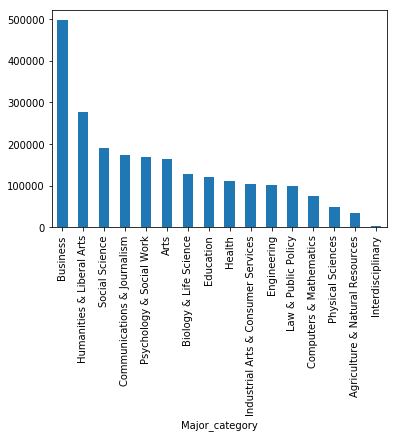

In [19]:
#Which major category has the most people in jobs that do not require a college degree?
NoDegreeCount = recent_grads.groupby('Major_category').Non_college_jobs.sum().sort_values(ascending=False)
NoDegreeCount.plot.bar()
#Business is the leader here, but that may be due to the sheer number of people with business degrees

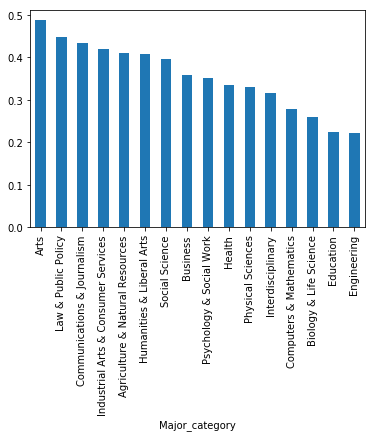

In [20]:
recent_grads['NoDegPct'] = recent_grads.Non_college_jobs / recent_grads.Total
PctNoDegree = recent_grads.groupby('Major_category').NoDegPct.mean().sort_values(ascending=False)
PctNoDegree.plot.bar()
# While the Business major category has the highest number of people with a job that does not require a college degree,
# the Arts major category has the highest percentage of people with a job that does not require a college degree

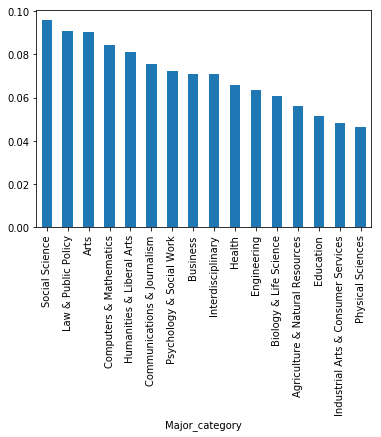

In [21]:
#Which major category has the highest average unemployment rate?
MeanUnemployed = recent_grads.groupby('Major_category').Unemployment_rate.mean().sort_values(ascending=False)
MeanUnemployed.plot.bar()
#Interesting that Law and Public Policy is in the second spot here...

In [22]:
grad_students

,Major_code,Major,Major_category,Grad_total,Grad_sample_size,Grad_employed,Grad_full_time_year_round,Grad_unemployed,Grad_unemployment_rate,Grad_median,...,Nongrad_total,Nongrad_employed,Nongrad_full_time_year_round,Nongrad_unemployed,Nongrad_unemployment_rate,Nongrad_median,Nongrad_P25,Nongrad_P75,Grad_share,Grad_premium
0,5601,CONSTRUCTION SERVICES,Industrial Arts & Consumer Services,9173,200,7098,6511,681,0.087543,75000.0,...,86062,73607,62435,3928,0.050661,65000.0,47000,98000.0,0.096320,0.153846
1,6004,COMMERCIAL ART AND GRAPHIC DESIGN,Arts,53864,882,40492,29553,2482,0.057756,60000.0,...,461977,347166,250596,25484,0.068386,48000.0,34000,71000.0,0.104420,0.250000
2,6211,HOSPITALITY MANAGEMENT,Business,24417,437,18368,14784,1465,0.073867,65000.0,...,179335,145597,113579,7409,0.048423,50000.0,35000,75000.0,0.119837,0.300000
3,2201,COSMETOLOGY SERVICES AND CULINARY ARTS,Industrial Arts & Consumer Services,5411,72,3590,2701,316,0.080901,47000.0,...,37575,29738,23249,1661,0.052900,41600.0,29000,60000.0,0.125878,0.129808
4,2001,COMMUNICATION TECHNOLOGIES,Computers & Mathematics,9109,171,7512,5622,466,0.058411,57000.0,...,53819,43163,34231,3389,0.072800,52000.0,36000,78000.0,0.144753,0.096154
5,3201,COURT REPORTING,Law & Public Policy,1542,22,1008,860,0,0.000000,75000.0,...,8921,6967,6063,518,0.069205,50000.0,34000,75000.0,0.147376,0.500000
6,6206,MARKETING AND MARKETING RESEARCH,Business,190996,3738,151570,123045,8324,0.052059,80000.0,...,1029181,817906,662346,45519,0.052719,60000.0,40000,91500.0,0.156531,0.333333
7,1101,AGRICULTURE PRODUCTION AND MANAGEMENT,Agriculture & Natural Resources,17488,386,13104,11207,473,0.034838,67000.0,...,89169,71781,61335,1869,0.025377,55000.0,38000,80000.0,0.163965,0.218182
8,2101,COMPUTER PROGRAMMING AND DATA PROCESSING,Computers & Mathematics,5611,98,4716,3981,119,0.024612,85000.0,...,28314,22024,18381,2222,0.091644,60000.0,40000,85000.0,0.165394,0.416667
9,1904,ADVERTISING AND PUBLIC RELATIONS,Communications & Journalism,33928,688,28517,22523,899,0.030562,60000.0,...,163435,127832,100330,8706,0.063762,51000.0,37800,78000.0,0.171907,0.176471
